# Customer Segmentation Project

## Project Overview
In this project, I am going to build a **Customer Segmentation system** to group customers based on their behavior and characteristics. Customer segmentation helps businesses better understand their users and make data-driven decisions such as targeted marketing and personalized services.

## Objectives
- Analyze customer data and identify meaningful patterns  
- Segment customers into distinct groups  
- Compare results between a **scikit-learn model** and a **model built from scratch**  
- Gain a deeper understanding of clustering algorithms  

## Tools & Technologies
- Python  
- NumPy  
- Pandas  
- Matplotlib / Seaborn (for visualization)  
- Scikit-learn  

## Approach
1. Load and explore the dataset  
2. Perform data preprocessing and feature scaling  
3. Implement a clustering model using **scikit-learn**  
4. Build the same clustering logic **from scratch** to understand how it works internally  
5. Evaluate and visualize the customer segments  

## Expected Outcome
By the end of this project, I expect to:
- Successfully segment customers into meaningful groups  
- Understand the internal working of clustering algorithms  
- Demonstrate both practical and theoretical knowledge of customer segmentation  


In [67]:
# essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
# loading the dataset and perform some data preprocessing

df = pd.read_csv('../datasets/Mall_Customers.csv', index_col=['CustomerID'])

In [60]:
df.head(1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [62]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**💡: Conclusion from the 2 cells above is that there isn't any missing(null) values in dataset.**

## **Select more informative and appropriate features for this case**

In [63]:
customer_data = df.iloc[:, [2,3]].values
customer_data.shape

(200, 2)

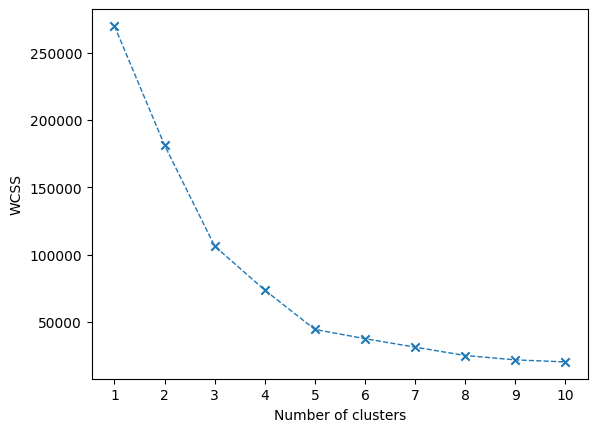

In [64]:
# find out best choice for number of clusters

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(customer_data)
    wcss.append(kmeans.inertia_)

plt.scatter(range(1,11), wcss, marker='x')
plt.plot(range(1,11), wcss, ls='--', lw=1)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

💡: **From the above elbow-like graph we can see that optimal number of clusters is 5**

In [65]:
def visualize(data,centroids, labels):
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.scatter(data[:, 0], data[:, 1],  c=labels, cmap='viridis')
    plt.show()

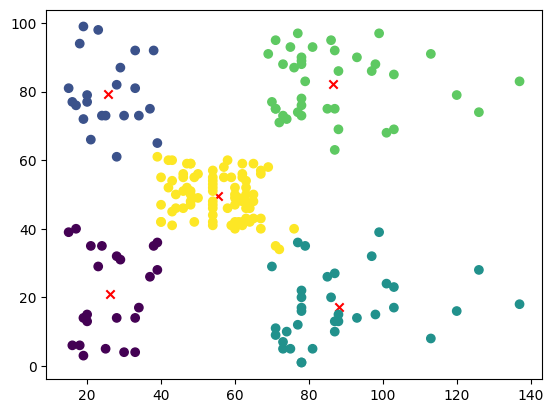

In [66]:
kmeans_model = KMeans(n_clusters=5, init="random", random_state=42)
y = kmeans_model.fit_predict(customer_data)
centroids = kmeans_model.cluster_centers_
visualize(customer_data, centroids, y)

**🔎: Calculating the silhouette score of the model**

In [68]:
silhouette = silhouette_score(customer_data, y)
print(silhouette)

0.553931997444648


## **Comparison with the one built from scratch**

In [69]:
def scratch_kmeans(X, k, iteration= 200):
    centroids = X[np.random.choice(X.shape[0], k, replace= False)]

    for i in range(iteration):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

In [75]:
centroids, labels = scratch_kmeans(customer_data, 5)

silhouette_scratch = silhouette_score(customer_data, labels)
print(silhouette_scratch)

0.553931997444648


**💡: The silhouette score of both models seem to be the same(a slight difference included which is ignored here.)**